# PROJECT WORKFLOW:
1. Data Exploration (EDA)
2. Data Cleaning & Feature Selection
3. Model Building
4. Model Evaluation

# STEP 1 : DATA EXPLORATION
 WHAT: Understand and visualize the dataset
   WHY:  Can't build good models without understanding data
   
   TASKS:<br>
   • Load and inspect data (shape, types, preview)<br>
   • Check data quality (missing values, duplicates)<br>
   • Analyze target variable (class distribution, balance)<br>
   • Statistical analysis (mean, std, min, max)<br>
   • Visualize distributions (histograms, box plots)<br>
   • Correlation analysis (heatmap)<br>
   • Identify outliers<br>
   
   OUTPUT: Statistics, plots, initial insights

## 1.1: Load Libraries and Data

In [15]:
import pandas as pd  # For working with tables/data
import numpy as np   # For mathematical operations
import matplotlib.pyplot as plt  # For creating graphs
import seaborn as sns  # For beautiful visualizations

In [16]:
# ============================================

benign_path = '../data/benign_data/benign_samples_1sec.csv'


# ============================================
# LOAD ALL 10 ATTACK FILES
# ============================================
attack_path1 = '../data/attack_data/attack_samples_1sec.csv'
attack_path2 = '../data/attack_data/attack_samples_2sec.csv'


# ============================================
# READ ALL BENIGN FILES
# ============================================
benign_df = pd.read_csv(benign_path)


# ============================================
# READ ALL ATTACK FILES
# ============================================
attack_df1 = pd.read_csv(attack_path1)
attack_df2 = pd.read_csv(attack_path2)


# ============================================
# ADD LABELS TO ALL BENIGN FILES
# ============================================
benign_df['is_attack'] = 0

# ============================================
# ADD LABELS TO ALL ATTACK FILES
# ============================================
attack_df1['is_attack'] = 1
attack_df2['is_attack'] = 1


# ============================================
# PRINT SHAPES OF ALL FILES
# ============================================
print("="*60)
print("BENIGN FILES")
print("="*60)
print("Dataset shape benign_df1:", benign_df.shape)

print("\n" + "="*60)
print("ATTACK FILES")
print("="*60)
print("Dataset shape attack_df1:", attack_df1.shape)
print("Dataset shape attack_df2:", attack_df2.shape)

# ============================================
# COMBINE ALL ATTACK FILES
# ============================================
attack_df = pd.concat([
    attack_df1, attack_df2
], ignore_index=True)

print("\n" + "="*60)
print("Combined attack_df:", attack_df.shape)
print("="*60)


# COMBINE ATTACK AND BENIGN
# ============================================
df = pd.concat([benign_df, attack_df], ignore_index=True)

# Shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n" + "="*60)
print("FINAL COMBINED DATASET")
print("="*60)
print(f"Total samples: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")


BENIGN FILES
Dataset shape benign_df1: (136800, 95)

ATTACK FILES
Dataset shape attack_df1: (90391, 95)
Dataset shape attack_df2: (44744, 95)

Combined attack_df: (135135, 95)

FINAL COMBINED DATASET
Total samples: 271,935
Total features: 95


In [17]:
df.head(2)

,device_name,device_mac,label_full,label1,label2,label3,label4,timestamp,timestamp_start,timestamp_end,...,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation,is_attack
0,sound-sensor,f0:08:d1:ce:cf:c8,attack_recon_vuln-scan_sound-sensor,attack,recon,vuln-scan,recon_vuln-scan,2025-01-15T16:42:31.668000Z_2025-01-15T16:42:3...,2025-01-15T16:42:31.668000Z,2025-01-15T16:42:32.668000Z,...,0.003103,151.111455,255.0,37.0,103.680086,3768.154799,65535.0,1024.0,5410.922077,1
1,rfid-sensor,08:b6:1f:82:2b:1c,benign_whole-network3,benign,benign,benign,benign,2025-09-09T14:50:43.400000Z_2025-09-09T14:50:4...,2025-09-09T14:50:43.400000Z,2025-09-09T14:50:44.400000Z,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0


## 1.2: Basic Dataset Info

In [18]:
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271935 entries, 0 to 271934
Data columns (total 95 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   device_name                           271935 non-null  object 
 1   device_mac                            271935 non-null  object 
 2   label_full                            271935 non-null  object 
 3   label1                                271935 non-null  object 
 4   label2                                271935 non-null  object 
 5   label3                                271935 non-null  object 
 6   label4                                271935 non-null  object 
 7   timestamp                             271935 non-null  object 
 8   timestamp_start                       271935 non-null  object 
 9   timestamp_end                         271935 non-null  object 
 10  log_data-ranges_avg                   271935 no

In [19]:
df.describe()

,log_data-ranges_avg,log_data-ranges_max,log_data-ranges_min,log_data-ranges_std_deviation,log_data-types_count,log_interval-messages,log_messages_count,network_fragmentation-score,network_fragmented-packets,network_header-length_avg,...,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation,is_attack
count,271935.000000,271935.000000,271935.00000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,...,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000
mean,54.435387,55.317676,52.60025,0.839298,0.252987,22.528944,0.601379,0.509291,416.424248,12.725960,...,0.005409,74.573491,124.538184,44.827054,30.953746,9681.861265,23276.677228,1352.666685,8536.761473,0.496939
std,205.999878,208.025699,200.31933,15.792031,0.529775,147.197651,2.255001,2.302108,2009.947440,9.622978,...,0.011827,72.464935,117.249720,52.738128,42.977394,15373.716259,30265.546123,3883.212257,12566.259512,0.499992
min,0.000000,0.000000,-0.94000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.000128,64.000000,64.000000,51.000000,0.000000,505.984352,512.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.004817,149.971429,255.000000,64.000000,93.964042,16458.763066,64062.000000,1024.000000,24011.813620,1.000000
max,2000.000000,2000.000000,2000.00000,574.959575,2.000000,1870.000000,191.000000,11.480000,13878.000000,24.000000,...,0.228020,255.000000,255.000000,255.000000,127.000000,65535.000000,65535.000000,65535.000000,32767.500000,1.000000


In [21]:
# Check if we have label columns
print(" Analyzing Target Variablessss (Labels):")
print("="*50)

# Simple binary label (attack vs benign)
print("\n1. Binary Classification (is_attack):")
print(df['is_attack'].value_counts())
print(f"\nPercentage distribution:")
print(df['is_attack'].value_counts(normalize=True) * 100)

# If label2 exists (attack categories like dos, ddos)
if 'label2' in df.columns:
    print("\n\n2. Attack Categories (label2):")
    print(df['label2'].value_counts())
    


# If label4 exists (full attack scenario names)
if 'label_full' in df.columns:
    print("\n\n4. Full Attack Scenarios (label4):")
    print(df['label4'].value_counts())

 Analyzing Target Variablessss (Labels):

1. Binary Classification (is_attack):
is_attack
0    136800
1    135135
Name: count, dtype: int64

Percentage distribution:
is_attack
0    50.306139
1    49.693861
Name: proportion, dtype: float64


2. Attack Categories (label2):
label2
benign        136800
recon          50275
dos            27520
ddos           26998
mitm           12050
malware        11301
web             4193
bruteforce      2798
Name: count, dtype: int64


4. Full Attack Scenarios (label4):
label4
benign                          136800
mitm_arp-spoofing                 6279
malware_mirai-udp-flood           6011
recon_os-scan                     5929
recon_host-disc-tcp-ack-ping      5897
                                 ...  
dos_mqtt-publish-flood              91
dos_slowloris-port-1883             91
ddos_slowloris-port-8000            91
dos_http-flood-port-443             91
dos_syn-flood-port-557              46
Name: count, Length: 84, dtype: int64


In [22]:
# Create a summary report
summary = f"""
{'='*60}
DATASET SUMMARY REPORT - STEP 1
{'='*60}

1. DATASET SIZE:
   - Total samples: {len(df):,}
   - Total features: {df.shape[1]}
   - Benign samples: {len(benign_df):,}
   - Attack samples: {len(attack_df):,}



4. DATA TYPES:
   - Numerical columns: {len(df.select_dtypes(include=[np.number]).columns)}
   - Categorical columns: {len(df.select_dtypes(include=['object']).columns)}


"""

print(summary)



DATASET SUMMARY REPORT - STEP 1

1. DATASET SIZE:
   - Total samples: 271,935
   - Total features: 95
   - Benign samples: 136,800
   - Attack samples: 135,135



4. DATA TYPES:
   - Numerical columns: 72
   - Categorical columns: 23





## 1.3: Missing Values Analysis

In [51]:
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing_Count': missing_count.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) ==  0:
       print("\n✅ No missing values! Dataset is complete.")

MISSING VALUES ANALYSIS

✅ No missing values! Dataset is complete.


## 1.4: Duplicated Values

In [23]:
print("="*80)
print("DUPLICATE ANALYSIS")
print("="*80)

dup_count = df.duplicated().sum()
dup_percent = (dup_count / len(df)) * 100

print(f"\n🔍 Duplicates: {dup_count:,} ({dup_percent:.2f}%)")

if dup_count > 0:
    print("⚠️  Found duplicates - will need to remove in cleaning step")
else:
    print("✅ No duplicates!")


DUPLICATE ANALYSIS

🔍 Duplicates: 0 (0.00%)
✅ No duplicates!


## Part 1.5: Class Distribution

CLASS DISTRIBUTION - TARGET VARIABLE

📊 Distribution:
   Benign (0): 136,800 samples (50.31%)
   Attack (1): 135,135 samples (49.69%)

📈 Imbalance Ratio: 1.01:1
✅ Well Balanced - No special handling needed


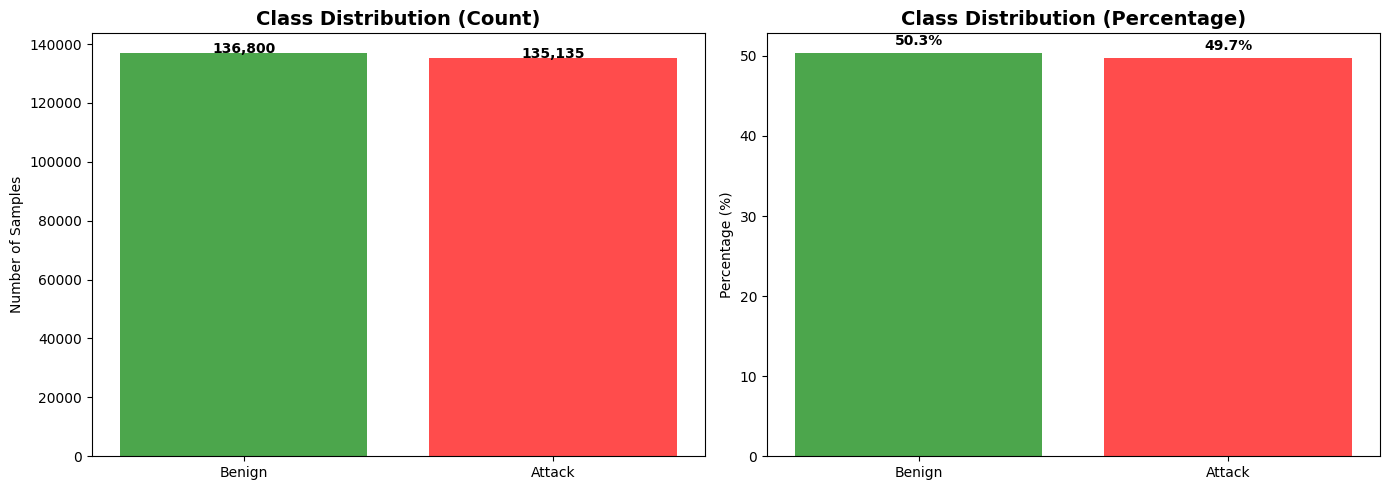

In [24]:
print("="*80)
print("CLASS DISTRIBUTION - TARGET VARIABLE")
print("="*80)

# Count classes
class_counts = df['is_attack'].value_counts().sort_index()
class_percent = df['is_attack'].value_counts(normalize=True).sort_index() * 100

print(f"\n📊 Distribution:")
print(f"   Benign (0): {class_counts[0]:,} samples ({class_percent[0]:.2f}%)")
print(f"   Attack (1): {class_counts[1]:,} samples ({class_percent[1]:.2f}%)")

# Calculate imbalance ratio
ratio = class_counts.max() / class_counts.min()
print(f"\n📈 Imbalance Ratio: {ratio:.2f}:1")

if ratio < 1.5:
    print("✅ Well Balanced - No special handling needed")
elif ratio < 3:
    print("⚠️  Slightly Imbalanced - Consider class weights")
else:
    print("🔴 Severely Imbalanced - Must use SMOTE or class weights!")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['Benign', 'Attack'], class_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Samples')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# Percentage plot
axes[1].bar(['Benign', 'Attack'], class_percent.values, color=['green', 'red'], alpha=0.7)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
for i, v in enumerate(class_percent.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# STEP 2 : DATA CLEANING
   WHAT: Fix problems and prepare data for ML<br>
   WHY:  Models need clean, consistent data<br>
   
   TASKS:<br>
   • Handle missing values (remove or impute)<br>
   • Remove duplicates<br>
   • Scale features (StandardScaler)<br>
   • Handle class imbalance (class weights)<br>
   • Train/test split (80/20, stratified)<br>
   
   OUTPUT: Clean dataset ready for modeling


## 2.0 Features 

### Purpose: Separate actual features from non-features Why: Labels are what we're trying to predict - including them would be cheating (data leakage). Identifiers like device names don't help predict attacks.

In [25]:
# Remove labels and identifiers
exclude = ['is_attack','label_full', 'label1', 'label2', 'label3', 'label4',
           'device_name', 'device_mac', 'timestamp', 'timestamp_start', 'timestamp_end']

feature_columns = [col for col in df.columns if col not in exclude]

print(f"Features: {len(feature_columns)}")

Features: 84


### Purpose: Filter to numeric data only Why: ML algorithms work with numbers, not text. Non-numeric columns (like IP addresses, MAC addresses) need special handling. What it does: Selects only columns with numeric data types (int, float)

In [26]:
# Keep only numeric features
numeric_features = df[feature_columns].select_dtypes(include=[np.number]).columns.tolist()

print(f"Numeric features: {len(numeric_features)}")

Numeric features: 71


## 2.1 Remove ZERO VARIANCE

### Purpose: Remove features that never change Why: If a feature has the same value for all samples (variance=0), it provides no information for distinguishing benign from attack. Example: if all samples have protocol='TCP', it can't help predict anything.

In [27]:
# Remove zero variance
variances = df[numeric_features].var()
features = variances[variances > 0].index.tolist()
print(f"After removing zero variance: {len(features)}")

After removing zero variance: 71


## 2.2 Remove correlated features

### Purpose: Remove redundant features Why: If two features are 95%+ correlated, they provide the same information. Keeping both wastes computation and can cause model to overweight that information. What it does: Calculates correlation between all feature pairs. If correlation > 0.95, drops one of them.

In [28]:
# Remove highly correlated (>0.95)
corr = df[features].corr().abs()
to_drop = set()

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if corr.iloc[i, j] > 0.95:
            to_drop.add(corr.columns[j])

features = [f for f in features if f not in to_drop]
print(f"Final features: {len(features)}")
print(features)


Final features: 51
['log_data-ranges_avg', 'log_data-ranges_std_deviation', 'log_data-types_count', 'log_interval-messages', 'log_messages_count', 'network_fragmentation-score', 'network_fragmented-packets', 'network_header-length_avg', 'network_header-length_std_deviation', 'network_interval-packets', 'network_ip-flags_avg', 'network_ip-flags_max', 'network_ip-flags_min', 'network_ip-flags_std_deviation', 'network_ip-length_avg', 'network_ip-length_max', 'network_ip-length_min', 'network_ip-length_std_deviation', 'network_ips_all_count', 'network_ips_src_count', 'network_mss_avg', 'network_mss_std_deviation', 'network_packet-size_min', 'network_packets_all_count', 'network_packets_src_count', 'network_payload-length_std_deviation', 'network_ports_all_count', 'network_ports_dst_count', 'network_protocols_all_count', 'network_protocols_dst_count', 'network_protocols_src_count', 'network_tcp-flags-ack_count', 'network_tcp-flags-fin_count', 'network_tcp-flags-syn_count', 'network_tcp-flag

## 2.3  Best features selection

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
X = df[features]        # numeric feature data
y = df['is_attack']     # target

# Train the model
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Show full ranking
print("Feature ranking:\n", feat_importances)


Feature ranking:
 network_time-delta_min                  0.141515
network_packet-size_min                 0.136004
network_packets_all_count               0.132885
network_ports_all_count                 0.083932
network_interval-packets                0.051360
network_ports_dst_count                 0.042319
network_time-delta_avg                  0.033905
network_packets_src_count               0.033796
network_tcp-flags-ack_count             0.025993
network_ttl_avg                         0.025200
network_time-delta_std_deviation        0.023179
network_time-delta_max                  0.022401
network_window-size_min                 0.019745
network_tcp-flags-syn_count             0.019608
network_protocols_dst_count             0.016076
network_ip-length_avg                   0.014978
network_window-size_std_deviation       0.014692
network_ttl_min                         0.013846
network_ttl_max                         0.013118
network_window-size_avg                 0.012991
ne

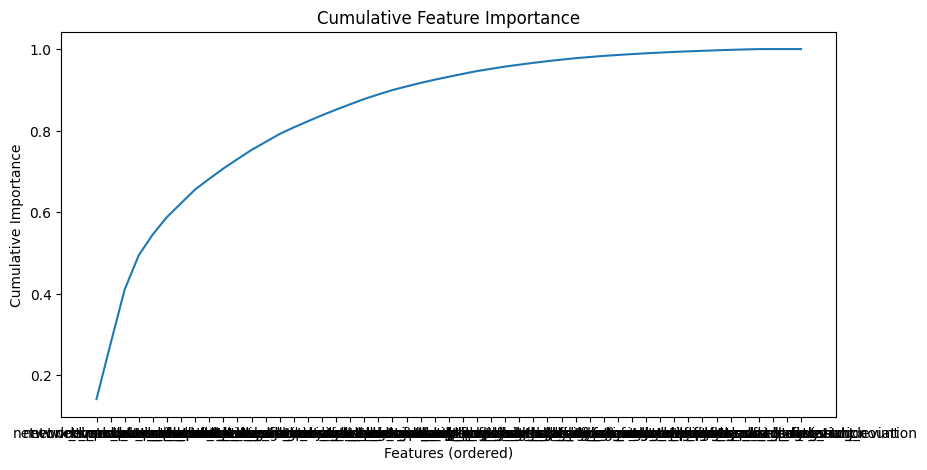

In [31]:
# Optional: cumulative importance
cumulative_importance = feat_importances.cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(cumulative_importance)
plt.ylabel('Cumulative Importance')
plt.xlabel('Features (ordered)')
plt.title('Cumulative Feature Importance')
plt.show()


In [52]:
# Keep features until 95% cumulative importance
final_features = cumulative_importance[cumulative_importance <= 0.99].index.tolist()

# Make sure all selected features exist in the dataframe
final_features = [f for f in final_features if f in df.columns]

# Create X with only the final features
X = df[final_features]
y = df['is_attack']

print("Final features to use:", final_features)
print("Shape of X:", X.shape)


Final features to use: ['network_time-delta_min', 'network_packet-size_min', 'network_packets_all_count', 'network_ports_all_count', 'network_interval-packets', 'network_ports_dst_count', 'network_time-delta_avg', 'network_packets_src_count', 'network_tcp-flags-ack_count', 'network_ttl_avg', 'network_time-delta_std_deviation', 'network_time-delta_max', 'network_window-size_min', 'network_tcp-flags-syn_count', 'network_protocols_dst_count', 'network_ip-length_avg', 'network_window-size_std_deviation', 'network_ttl_min', 'network_ttl_max', 'network_window-size_avg', 'network_ip-length_max', 'network_mss_avg', 'network_header-length_avg', 'network_ip-length_min', 'network_window-size_max', 'network_tcp-flags_avg', 'network_ttl_std_deviation', 'network_ips_all_count', 'network_ip-length_std_deviation', 'network_ip-flags_std_deviation', 'network_tcp-flags_std_deviation', 'network_payload-length_std_deviation', 'network_tcp-flags_min', 'network_ips_src_count', 'network_ip-flags_avg', 'log_da

# STEP 4 : TRAINING

## BASELINE MODELS

### 🧠 Model 1: Logistic Regression 

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)


(217548, 40) (54387, 40)


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [73]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=5000)

# Train the model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

Accuracy: 0.8829
Precision: 0.9668
Recall: 0.7915
F1-Score: 0.8704


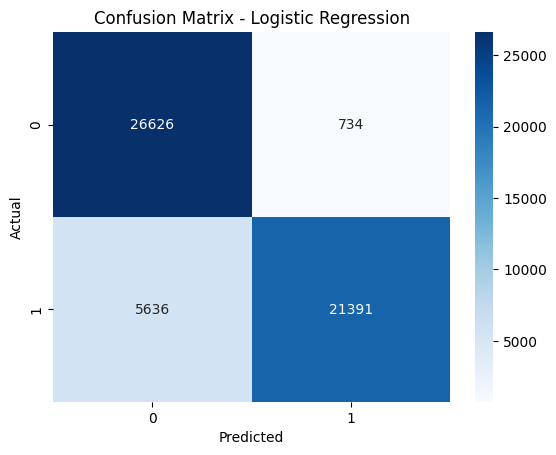

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 🧠 Model 2: K-Nearest Neighbors (KNN)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

Accuracy: 0.9125
Precision: 0.9753
Recall: 0.8454
F1-Score: 0.9057


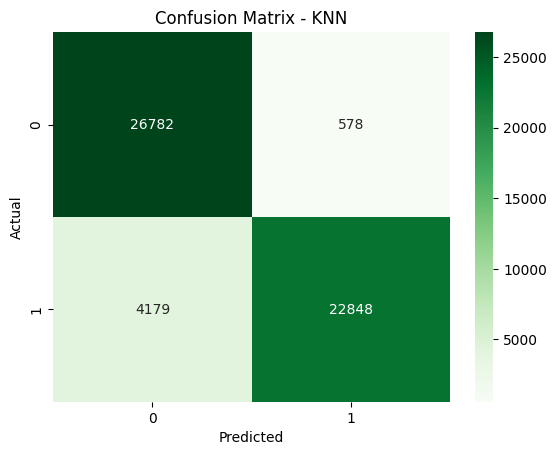

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn, zero_division=0)
rec = recall_score(y_test, y_pred_knn, zero_division=0)
f1 = f1_score(y_test, y_pred_knn, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  Model 3: Decision Tree Classifier 

### Decision Trees make predictions by learning simple decision rules from features. They're:
- Easy to interpret and visualize
- Can capture non-linear patterns
- Don't require feature scaling 
- Can overfit if not controlled 

In [36]:
# Step 1: Import Required Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Step 2: Create and Train Decision Tree Model
# max_depth=10 limits tree depth to prevent overfitting
# random_state=42 ensures reproducibility

dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train_scaled, y_train)

print("✅ Decision Tree model trained successfully!")

✅ Decision Tree model trained successfully!


In [38]:
# Step 3: Make Predictions on Test Set
y_pred_dt = dt.predict(X_test_scaled)

print(f"✅ Predictions made on {len(y_pred_dt)} test samples")
# Step 4: Evaluate Model Performance
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt, zero_division=0)
rec = recall_score(y_test, y_pred_dt, zero_division=0)
f1 = f1_score(y_test, y_pred_dt, zero_division=0)

print("=" * 50)
print("DECISION TREE - PERFORMANCE METRICS")
print("=" * 50)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("=" * 50)

✅ Predictions made on 54387 test samples
DECISION TREE - PERFORMANCE METRICS
Accuracy:  0.9323
Precision: 0.9934
Recall:    0.8696
F1-Score:  0.9274


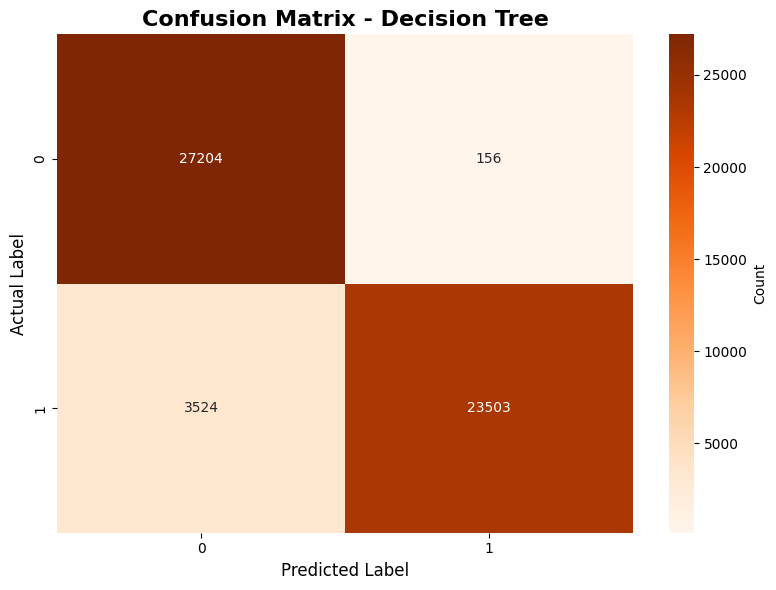


📊 Confusion Matrix Breakdown:
True Negatives (Normal correctly identified): 27204
False Positives (Normal flagged as Attack): 156
False Negatives (Attack missed): 3524
True Positives (Attack correctly identified): 23503


In [39]:
# Step 5: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Breakdown:")
print(f"True Negatives (Normal correctly identified): {cm[0][0]}")
print(f"False Positives (Normal flagged as Attack): {cm[0][1]}")
print(f"False Negatives (Attack missed): {cm[1][0]}")
print(f"True Positives (Attack correctly identified): {cm[1][1]}")

# STEP 2 : Intermediate Models

## Model 1 : Random Forest

1- Random Forest is an ensemble of Decision Trees. Key advantages: <br>
 - Reduces overfitting compared to a single Decision Tree
 - Captures non-linear patterns
 - Generally gives very strong performance on tabular data

In [55]:
# Step 1: Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [56]:
# Retrain Random Forest with class weights
# Make attack class even more important
# Retrain Random Forest with class weights
rf_weighted = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    class_weight={0: 1, 1: 5},  # Attack class is 5x more important
    random_state=42,
    n_jobs=-1
)

rf_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = rf_weighted.predict(X_test_scaled)

print("="*60)
print("RANDOM FOREST WITH CLASS WEIGHTS")
print("="*60)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_weighted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_weighted):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_weighted):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_weighted):.4f}")
print("="*60)

RANDOM FOREST WITH CLASS WEIGHTS
Accuracy:  0.9393
Precision: 0.9855
Recall:    0.8910
F1-Score:  0.9359


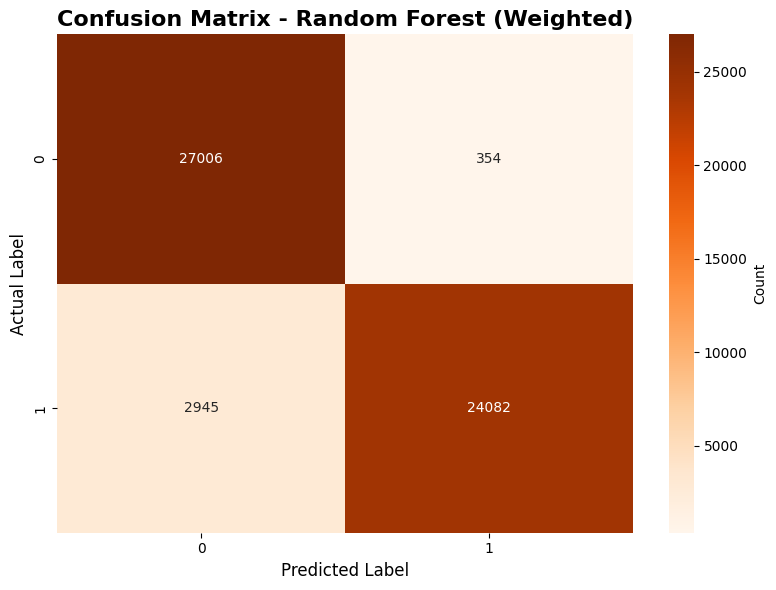


📊 Confusion Matrix Breakdown:
True Negatives (Normal correctly identified): 27006
False Positives (Normal flagged as Attack): 354
False Negatives (Attack missed): 2945
True Positives (Attack correctly identified): 24082


In [57]:
# Step 3: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_weighted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Random Forest (Weighted)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Breakdown:")
print(f"True Negatives (Normal correctly identified): {cm[0][0]}")
print(f"False Positives (Normal flagged as Attack): {cm[0][1]}")
print(f"False Negatives (Attack missed): {cm[1][0]}")
print(f"True Positives (Attack correctly identified): {cm[1][1]}")

MULTI-CLASS ATTACK CLASSIFICATION - 8 CATEGORIES

📊 Target Distribution:
label2
benign        136800
recon          50275
dos            27520
ddos           26998
mitm           12050
malware        11301
web             4193
bruteforce      2798
Name: count, dtype: int64

✅ Number of classes: 8

Label Encoding Mapping:
  0: benign          → 136,800 samples
  1: bruteforce      → 2,798 samples
  2: ddos            → 26,998 samples
  3: dos             → 27,520 samples
  4: malware         → 11,301 samples
  5: mitm            → 12,050 samples
  6: recon           → 50,275 samples
  7: web             → 4,193 samples

📦 Features: 40 columns, 271,935 samples

📂 Train/Test Split:
  Train: 217,548 samples
  Test:  54,387 samples
✅ Features scaled!

🤖 TRAINING MULTI-CLASS XGBOOST
⏳ Training in progress...
✅ Training complete!

🎯 MULTI-CLASS CLASSIFICATION RESULTS

🎯 Overall Accuracy: 0.9336 (93.36%)

📊 Per-Class Performance (Precision, Recall, F1):
              precision    recall  f1-sc

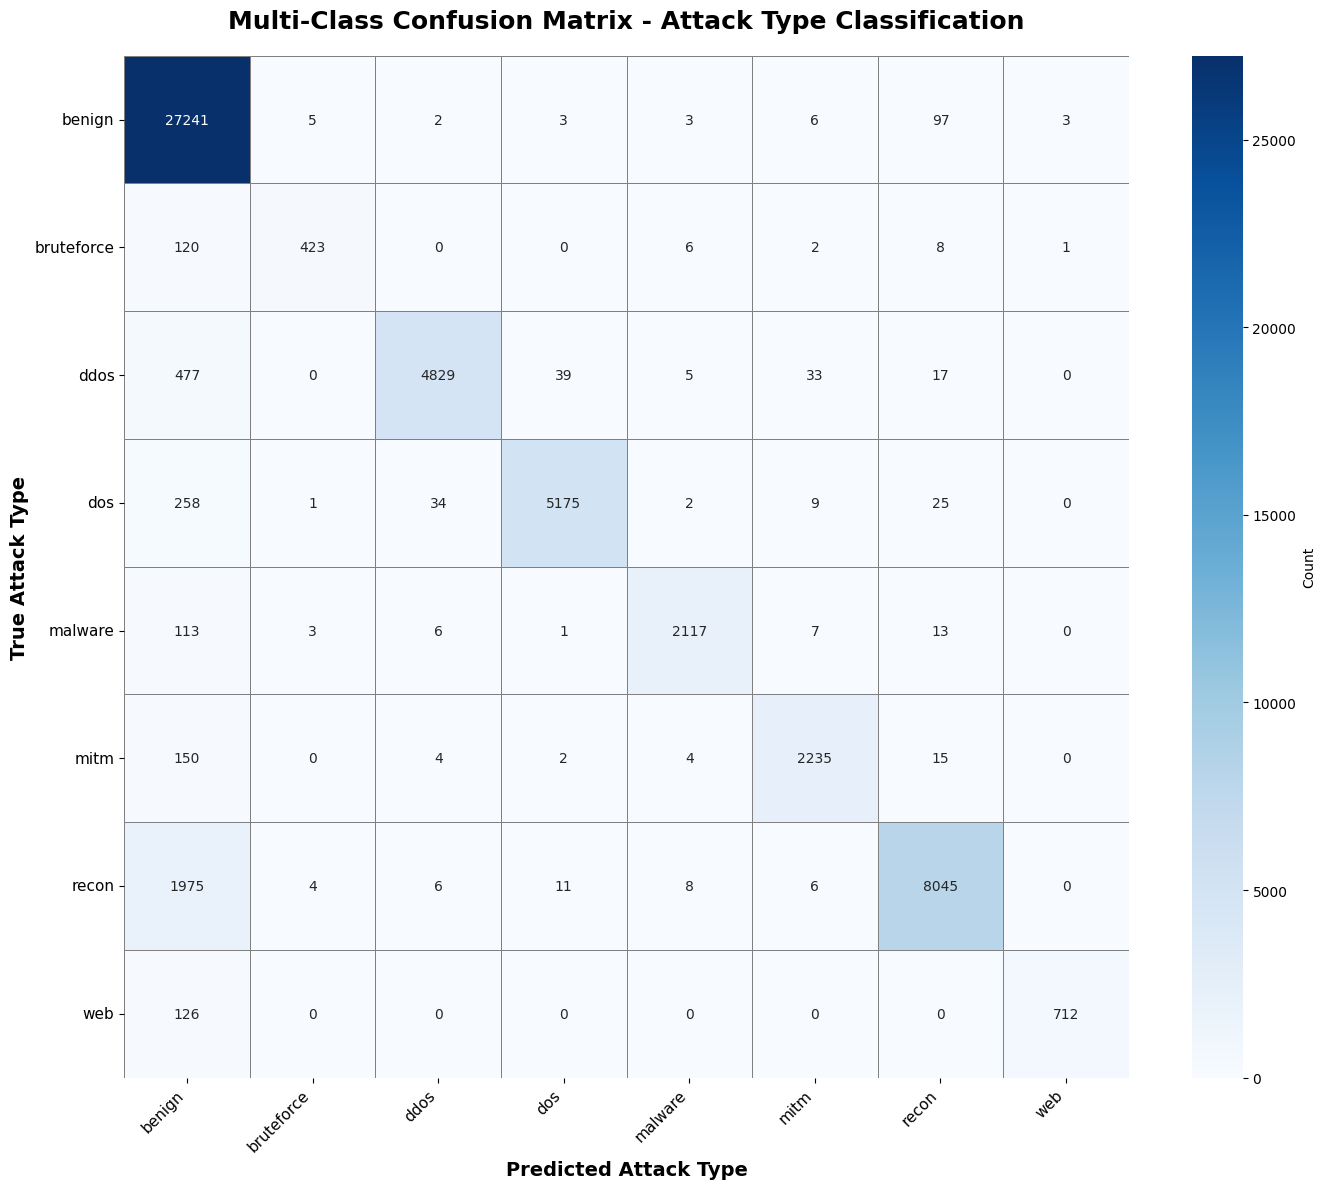


🔍 Detailed Breakdown by Attack Type:
🟢 benign         : 27,241/27,360 correct ( 99.57%)
🔴 bruteforce     :   423/  560 correct ( 75.54%)
🟡 ddos           : 4,829/5,400 correct ( 89.43%)
🟡 dos            : 5,175/5,504 correct ( 94.02%)
🟡 malware        : 2,117/2,260 correct ( 93.67%)
🟡 mitm           : 2,235/2,410 correct ( 92.74%)
🔴 recon          : 8,045/10,055 correct ( 80.01%)
🔴 web            :   712/  838 correct ( 84.96%)

❌ Most Common Misclassifications:
  recon        → benign       : 1,975 times
  ddos         → benign       :  477 times
  dos          → benign       :  258 times
  mitm         → benign       :  150 times
  web          → benign       :  126 times
  bruteforce   → benign       :  120 times
  malware      → benign       :  113 times
  benign       → recon        :   97 times
  ddos         → dos          :   39 times
  dos          → ddos         :   34 times

✅ MULTI-CLASS TRAINING COMPLETE!


In [58]:
# ============================================
# STEP 4: MULTI-CLASS TRAINING (label2)
# ============================================

print("="*80)
print("MULTI-CLASS ATTACK CLASSIFICATION - 8 CATEGORIES")
print("="*80)

# ============================================
# SET TARGET TO label2
# ============================================
y = df['label2']

print(f"\n📊 Target Distribution:")
print(y.value_counts())
print(f"\n✅ Number of classes: {y.nunique()}")

# ============================================
# ENCODE LABELS (Convert text to numbers)
# ============================================
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\n" + "="*60)
print("Label Encoding Mapping:")
print("="*60)
for i, label in enumerate(le.classes_):
    count = sum(y == label)
    print(f"  {i}: {label:15s} → {count:,} samples")

# ============================================
# PREPARE FEATURES
# ============================================
X = df[final_features]

print(f"\n📦 Features: {X.shape[1]} columns, {X.shape[0]:,} samples")

# ============================================
# TRAIN/TEST SPLIT
# ============================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded  # Keep class balance
)

print("\n" + "="*60)
print("📂 Train/Test Split:")
print("="*60)
print(f"  Train: {X_train.shape[0]:,} samples")
print(f"  Test:  {X_test.shape[0]:,} samples")

# ============================================
# SCALE FEATURES
# ============================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled!")

# ============================================
# TRAIN MULTI-CLASS XGBOOST
# ============================================
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n" + "="*60)
print("🤖 TRAINING MULTI-CLASS XGBOOST")
print("="*60)

xgb_multi = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

print("⏳ Training in progress...")
xgb_multi.fit(X_train_scaled, y_train)
print("✅ Training complete!")

# ============================================
# MAKE PREDICTIONS
# ============================================
y_pred = xgb_multi.predict(X_test_scaled)

# ============================================
# OVERALL ACCURACY
# ============================================
print("\n" + "="*80)
print("🎯 MULTI-CLASS CLASSIFICATION RESULTS")
print("="*80)

acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Overall Accuracy: {acc:.4f} ({acc*100:.2f}%)")

# ============================================
# DETAILED CLASSIFICATION REPORT
# ============================================
print("\n" + "="*60)
print("📊 Per-Class Performance (Precision, Recall, F1):")
print("="*60)
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))

# ============================================
# CONFUSION MATRIX VISUALIZATION
# ============================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_,
            cbar_kws={'label': 'Count'},
            linewidths=0.5,
            linecolor='gray')
plt.title('Multi-Class Confusion Matrix - Attack Type Classification', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Predicted Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('True Attack Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

# ============================================
# ATTACK-BY-ATTACK BREAKDOWN
# ============================================
print("\n" + "="*60)
print("🔍 Detailed Breakdown by Attack Type:")
print("="*60)

for i, attack_type in enumerate(le.classes_):
    mask = y_test == i
    if sum(mask) > 0:
        correct = sum((y_test == i) & (y_pred == i))
        total = sum(mask)
        acc_class = correct / total
        
        # Emoji based on accuracy
        if acc_class >= 0.95:
            emoji = "🟢"
        elif acc_class >= 0.85:
            emoji = "🟡"
        else:
            emoji = "🔴"
            
        print(f"{emoji} {attack_type:15s}: {correct:5,}/{total:5,} correct ({acc_class*100:6.2f}%)")

# ============================================
# MISCLASSIFICATION ANALYSIS
# ============================================
print("\n" + "="*60)
print("❌ Most Common Misclassifications:")
print("="*60)

misclassified = []
for i in range(len(le.classes_)):
    for j in range(len(le.classes_)):
        if i != j and cm[i][j] > 0:
            misclassified.append((le.classes_[i], le.classes_[j], cm[i][j]))

# Sort by count
misclassified.sort(key=lambda x: x[2], reverse=True)

# Show top 10
for true_label, pred_label, count in misclassified[:10]:
    print(f"  {true_label:12s} → {pred_label:12s} : {count:4,} times")

print("\n" + "="*80)
print("✅ MULTI-CLASS TRAINING COMPLETE!")
print("="*80)

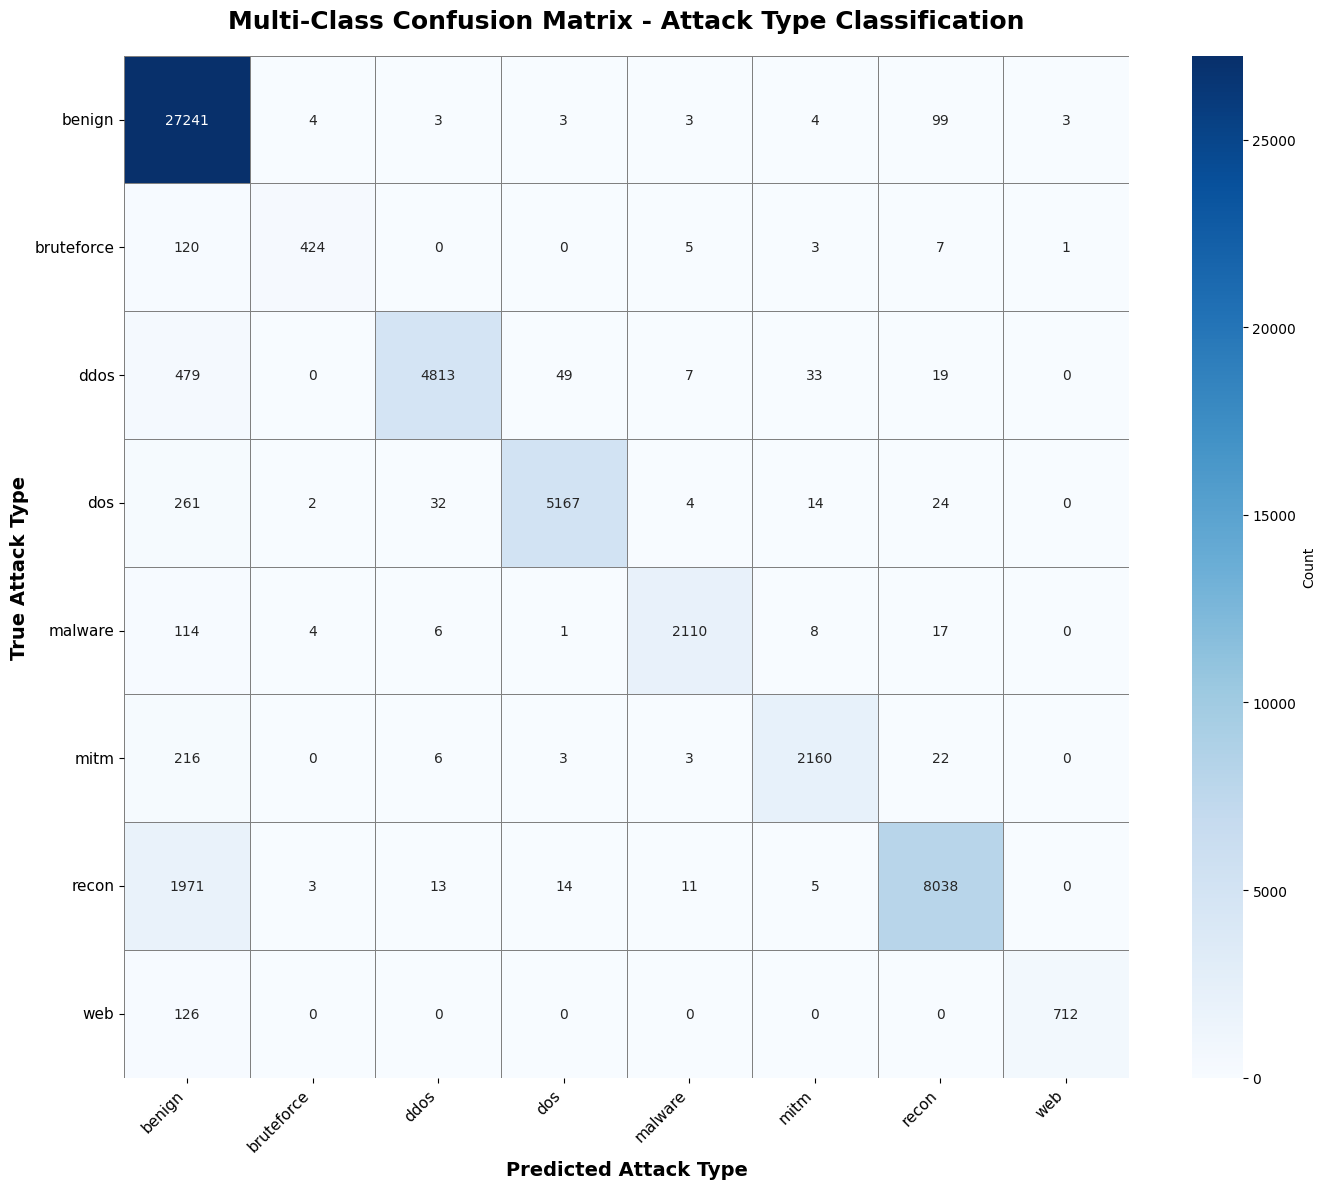

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_,
            cbar_kws={'label': 'Count'},
            linewidths=0.5,
            linecolor='gray')
plt.title('Multi-Class Confusion Matrix - Attack Type Classification', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Predicted Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('True Attack Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


MULTI-CLASS ATTACK CLASSIFICATION - 8 CATEGORIES (Random Forest)

📊 Target Distribution:
label2
benign        136800
recon          50275
dos            27520
ddos           26998
mitm           12050
malware        11301
web             4193
bruteforce      2798
Name: count, dtype: int64

✅ Number of classes: 8

Label Encoding Mapping:
  0: benign          → 136,800 samples
  1: bruteforce      → 2,798 samples
  2: ddos            → 26,998 samples
  3: dos             → 27,520 samples
  4: malware         → 11,301 samples
  5: mitm            → 12,050 samples
  6: recon           → 50,275 samples
  7: web             → 4,193 samples

📦 Features: 40 columns, 271,935 samples

📂 Train/Test Split:
  Train: 217,548 samples
  Test:  54,387 samples
✅ Features scaled!

🤖 TRAINING MULTI-CLASS RANDOM FOREST
⏳ Training in progress...
✅ Training complete!

🎯 MULTI-CLASS CLASSIFICATION RESULTS

🎯 Overall Accuracy: 0.9340 (93.40%)

Classification Report:
              precision    recall  f1-score 

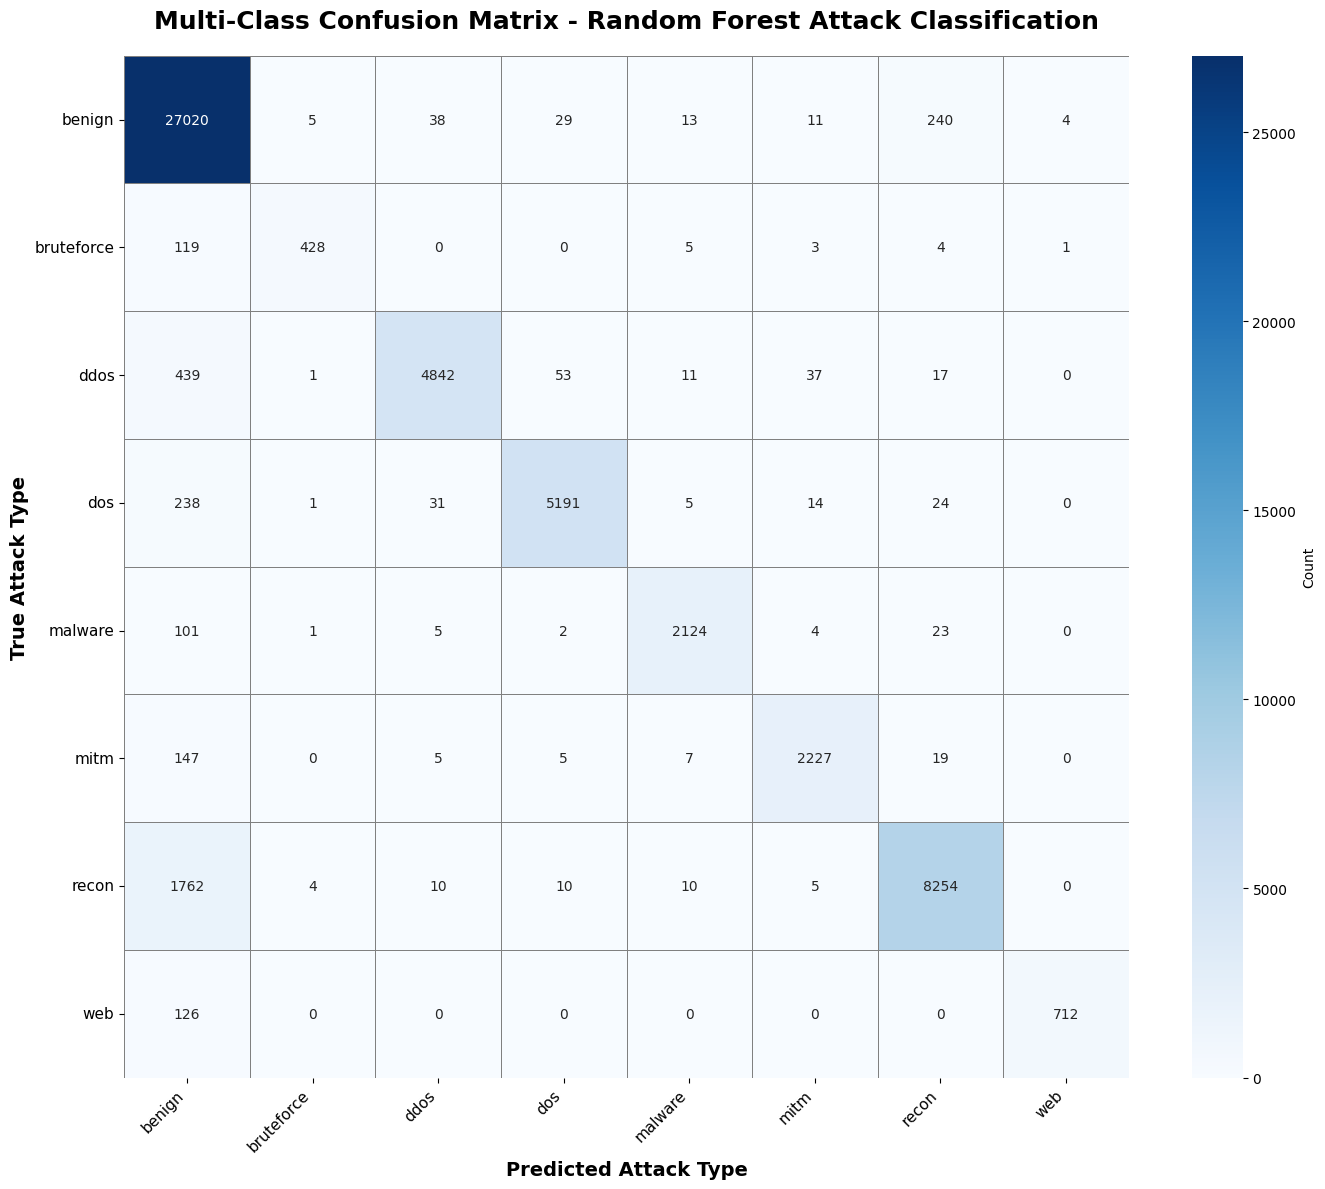


🔍 Detailed Breakdown by Attack Type:
🟢 benign         : 27,020/27,360 correct ( 98.76%)
🔴 bruteforce     :   428/  560 correct ( 76.43%)
🟡 ddos           : 4,842/5,400 correct ( 89.67%)
🟡 dos            : 5,191/5,504 correct ( 94.31%)
🟡 malware        : 2,124/2,260 correct ( 93.98%)
🟡 mitm           : 2,227/2,410 correct ( 92.41%)
🔴 recon          : 8,254/10,055 correct ( 82.09%)
🔴 web            :   712/  838 correct ( 84.96%)

❌ Most Common Misclassifications:
  recon        → benign       : 1,762 times
  ddos         → benign       :  439 times
  benign       → recon        :  240 times
  dos          → benign       :  238 times
  mitm         → benign       :  147 times
  web          → benign       :  126 times
  bruteforce   → benign       :  119 times
  malware      → benign       :  101 times
  ddos         → dos          :   53 times
  benign       → ddos         :   38 times

✅ MULTI-CLASS RANDOM FOREST TRAINING COMPLETE!


In [59]:
# ============================================
# STEP 4: MULTI-CLASS TRAINING (label2)
# ============================================

print("="*80)
print("MULTI-CLASS ATTACK CLASSIFICATION - 8 CATEGORIES (Random Forest)")
print("="*80)

# ============================================
# SET TARGET TO label2
# ============================================
y = df['label2']

print(f"\n📊 Target Distribution:")
print(y.value_counts())
print(f"\n✅ Number of classes: {y.nunique()}")

# ============================================
# ENCODE LABELS (Convert text to numbers)
# ============================================
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\n" + "="*60)
print("Label Encoding Mapping:")
print("="*60)
for i, label in enumerate(le.classes_):
    count = sum(y == label)
    print(f"  {i}: {label:15s} → {count:,} samples")

# ============================================
# PREPARE FEATURES
# ============================================
X = df[final_features]

print(f"\n📦 Features: {X.shape[1]} columns, {X.shape[0]:,} samples")

# ============================================
# TRAIN/TEST SPLIT
# ============================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("\n" + "="*60)
print("📂 Train/Test Split:")
print("="*60)
print(f"  Train: {X_train.shape[0]:,} samples")
print(f"  Test:  {X_test.shape[0]:,} samples")

# ============================================
# SCALE FEATURES
# ============================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled!")

# ============================================
# TRAIN MULTI-CLASS RANDOM FOREST
# ============================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n" + "="*60)
print("🤖 TRAINING MULTI-CLASS RANDOM FOREST")
print("="*60)

rf_multi = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

print("⏳ Training in progress...")
rf_multi.fit(X_train_scaled, y_train)
print("✅ Training complete!")

# ============================================
# MAKE PREDICTIONS
# ============================================
y_pred = rf_multi.predict(X_test_scaled)

# ============================================
# OVERALL ACCURACY
# ============================================
print("\n" + "="*80)
print("🎯 MULTI-CLASS CLASSIFICATION RESULTS")
print("="*80)

acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Overall Accuracy: {acc:.4f} ({acc*100:.2f}%)")

# ============================================
# DETAILED CLASSIFICATION REPORT (formatted)
# ============================================
report = classification_report(
    y_test, y_pred, 
    target_names=le.classes_, 
    digits=2
)
print("\nClassification Report:")
print(report)

# ============================================
# CONFUSION MATRIX VISUALIZATION
# ============================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cbar_kws={'label': 'Count'},
            linewidths=0.5,
            linecolor='gray')
plt.title('Multi-Class Confusion Matrix - Random Forest Attack Classification',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Predicted Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('True Attack Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

# ============================================
# ATTACK-BY-ATTACK BREAKDOWN
# ============================================
print("\n" + "="*60)
print("🔍 Detailed Breakdown by Attack Type:")
print("="*60)

for i, attack_type in enumerate(le.classes_):
    mask = y_test == i
    if sum(mask) > 0:
        correct = sum((y_test == i) & (y_pred == i))
        total = sum(mask)
        acc_class = correct / total

        # Emoji based on accuracy
        if acc_class >= 0.95:
            emoji = "🟢"
        elif acc_class >= 0.85:
            emoji = "🟡"
        else:
            emoji = "🔴"

        print(f"{emoji} {attack_type:15s}: {correct:5,}/{total:5,} correct ({acc_class*100:6.2f}%)")

# ============================================
# MISCLASSIFICATION ANALYSIS
# ============================================
print("\n" + "="*60)
print("❌ Most Common Misclassifications:")
print("="*60)

misclassified = []
for i in range(len(le.classes_)):
    for j in range(len(le.classes_)):
        if i != j and cm[i][j] > 0:
            misclassified.append((le.classes_[i], le.classes_[j], cm[i][j]))

misclassified.sort(key=lambda x: x[2], reverse=True)

for true_label, pred_label, count in misclassified[:10]:
    print(f"  {true_label:12s} → {pred_label:12s} : {count:4,} times")

print("\n" + "="*80)
print("✅ MULTI-CLASS RANDOM FOREST TRAINING COMPLETE!")
print("="*80)


In [60]:
# Calculate class weights (give more importance to small classes)
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight('balanced', y_train)

print("\n" + "="*60)
print("🔧 TRAINING WITH CLASS WEIGHTS")
print("="*60)

xgb_weighted = XGBClassifier(
    n_estimators=400,  # More trees
    max_depth=12,      # Deeper
    learning_rate=0.05,  # Slower learning
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

print("⏳ Training with balanced weights...")
xgb_weighted.fit(X_train_scaled, y_train, sample_weight=sample_weights)
print("✅ Training complete!")

y_pred_weighted = xgb_weighted.predict(X_test_scaled)

# Evaluate
print("\n" + "="*60)
print("📊 RESULTS WITH CLASS WEIGHTS:")
print("="*60)
print(classification_report(y_test, y_pred_weighted, target_names=le.classes_, digits=4))

# Quick breakdown
for i, attack_type in enumerate(le.classes_):
    mask = y_test == i
    if sum(mask) > 0:
        correct = sum((y_test == i) & (y_pred_weighted == i))
        total = sum(mask)
        acc_class = correct / total
        
        if acc_class >= 0.95:
            emoji = "🟢"
        elif acc_class >= 0.85:
            emoji = "🟡"
        else:
            emoji = "🔴"
            
        print(f"{emoji} {attack_type:15s}: {correct:5,}/{total:5,} correct ({acc_class*100:6.2f}%)")


🔧 TRAINING WITH CLASS WEIGHTS
⏳ Training with balanced weights...
✅ Training complete!

📊 RESULTS WITH CLASS WEIGHTS:
              precision    recall  f1-score   support

      benign     0.8977    0.9868    0.9401     27360
  bruteforce     0.9489    0.7625    0.8455       560
        ddos     0.9883    0.8930    0.9382      5400
         dos     0.9811    0.9420    0.9612      5504
     malware     0.9523    0.9442    0.9482      2260
        mitm     0.9643    0.9307    0.9472      2410
       recon     0.9645    0.8062    0.8783     10055
         web     0.9834    0.8508    0.9123       838

    accuracy                         0.9309     54387
   macro avg     0.9601    0.8895    0.9214     54387
weighted avg     0.9345    0.9309    0.9299     54387

🟢 benign         : 26,999/27,360 correct ( 98.68%)
🔴 bruteforce     :   427/  560 correct ( 76.25%)
🟡 ddos           : 4,822/5,400 correct ( 89.30%)
🟡 dos            : 5,185/5,504 correct ( 94.20%)
🟡 malware        : 2,134/2,260 c

In [61]:
from imblearn.over_sampling import SMOTE

print("\n" + "="*60)
print("🔧 BALANCING DATASET WITH SMOTE")
print("="*60)

# Balance the training data
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"Before SMOTE: {len(y_train):,} samples")
print(f"After SMOTE:  {len(y_train_balanced):,} samples")

print("\nClass distribution after SMOTE:")
for i, label in enumerate(le.classes_):
    count = sum(y_train_balanced == i)
    print(f"  {label:15s}: {count:,} samples")

# Train on balanced data
xgb_smote = XGBClassifier(
    n_estimators=400,
    max_depth=10,
    learning_rate=0.05,
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42,
    n_jobs=-1
)

print("\n⏳ Training on balanced dataset...")
xgb_smote.fit(X_train_balanced, y_train_balanced)
print("✅ Training complete!")

y_pred_smote = xgb_smote.predict(X_test_scaled)

# Evaluate
print("\n" + "="*60)
print("📊 RESULTS WITH SMOTE:")
print("="*60)

for i, attack_type in enumerate(le.classes_):
    mask = y_test == i
    if sum(mask) > 0:
         correct = sum((y_test == i) & (y_pred_smote == i))
        total = sum(mask)
        acc_class = correct / total
        
        if acc_class >= 0.95:
            emoji = "🟢"
        elif acc_class >= 0.85:
            emoji = "🟡"
        else:
            emoji = "🔴"
            
        print(f"{emoji} {attack_type:15s}: {correct:5,}/{total:5,} correct ({acc_class*100:6.2f}%)")


🔧 BALANCING DATASET WITH SMOTE
Before SMOTE: 217,548 samples
After SMOTE:  875,520 samples

Class distribution after SMOTE:
  benign         : 109,440 samples
  bruteforce     : 109,440 samples
  ddos           : 109,440 samples
  dos            : 109,440 samples
  malware        : 109,440 samples
  mitm           : 109,440 samples
  recon          : 109,440 samples
  web            : 109,440 samples

⏳ Training on balanced dataset...
✅ Training complete!

📊 RESULTS WITH SMOTE:
🟢 benign         : 26,958/27,360 correct ( 98.53%)
🔴 bruteforce     :   427/  560 correct ( 76.25%)
🟡 ddos           : 4,812/5,400 correct ( 89.11%)
🟡 dos            : 5,177/5,504 correct ( 94.06%)
🟡 malware        : 2,124/2,260 correct ( 93.98%)
🟡 mitm           : 2,236/2,410 correct ( 92.78%)
🔴 recon          : 8,061/10,055 correct ( 80.17%)
🟡 web            :   713/  838 correct ( 85.08%)
